In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (accuracy_score,
                    precision_score,recall_score,
                    confusion_matrix,ConfusionMatrixDisplay,
                    precision_recall_curve,
                    roc_auc_score,roc_curve)

In [5]:
data = pd.read_csv('Heart_Disease_Prediction.csv')
data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
df = data.drop('index',axis=1)

In [9]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [13]:
label_enc = LabelEncoder()

In [15]:
y_train = label_enc.fit_transform(y_train)
y_test = label_enc.transform(y_test)

In [17]:
model = DecisionTreeClassifier(max_depth=5)

In [19]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [20]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

# Metrics

In [25]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.78
Precision: 0.68
Recall: 0.85


In [27]:
cm = confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[35, 13],
       [ 5, 28]], dtype=int64)

In [29]:
label_enc.classes_

array(['Absence', 'Presence'], dtype=object)

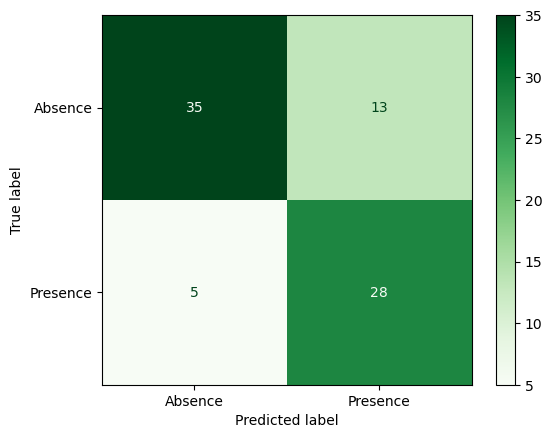

In [31]:
cm_disp = ConfusionMatrixDisplay(cm,display_labels=label_enc.classes_)
cm_disp.plot(cmap='Greens')

plt.show()

In [32]:
(55)/(55+14+12) # accuracy

0.6790123456790124

In [33]:
# precision : out of all positive predictions, how many are correct 
22/(12+22)

0.6470588235294118

In [34]:
# recall : out of all actual positive classes, how many are predicted correctly 
22/(14+22)

0.6111111111111112

In [36]:
y_probs = model.predict_proba(X_test)

In [37]:
y_probs

array([[0.98333333, 0.01666667],
       [0.33333333, 0.66666667],
       [0.02083333, 0.97916667],
       [0.98333333, 0.01666667],
       [0.33333333, 0.66666667],
       [0.98333333, 0.01666667],
       [0.98333333, 0.01666667],
       [0.98333333, 0.01666667],
       [1.        , 0.        ],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [0.98333333, 0.01666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [0.98333333, 0.01666667],
       [0.02083333, 0.97916667],
       [1.        , 0.        ],
       [0.02083333, 0.97916667],
       [0.02083333, 0.97916667],
       [1.        , 0.        ],
       [0.98333333, 0.01666667],
       [0.69230769, 0.30769231],
       [0.98333333, 0.01666667],
       [0.98333333, 0.01666667],
       [0.

In [39]:
probablities = pd.DataFrame(data=y_probs,columns=['Absence(-ve class)','Presence(+ve class)'])

In [40]:
probablities.head()

,Absence(-ve class),Presence(+ve class)
0,0.983333,0.016667
1,0.333333,0.666667
2,0.020833,0.979167
3,0.983333,0.016667
4,0.333333,0.666667


In [51]:
y_scores = y_probs[:,1]

In [53]:
# PR roc_curve
pr,re,threshold = precision_recall_curve(y_test,y_scores)

In [54]:
pr

array([0.40740741, 0.42253521, 0.60869565, 0.68292683, 0.71794872,
       0.76923077, 1.        ])

In [55]:
re

array([1.        , 0.90909091, 0.84848485, 0.84848485, 0.84848485,
       0.3030303 , 0.        ])

In [56]:
threshold

array([0.        , 0.01666667, 0.30769231, 0.66666667, 0.97916667,
       1.        ])

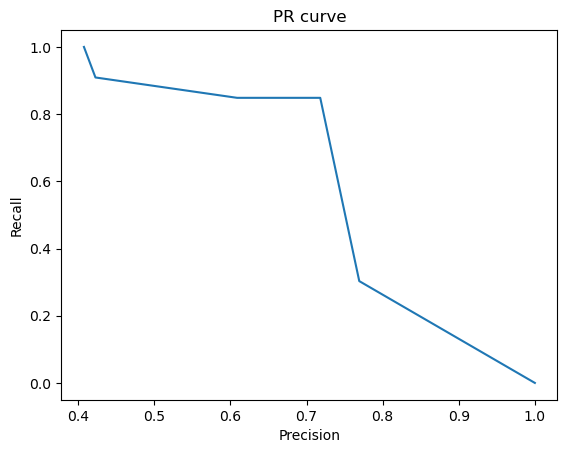

In [57]:
plt.plot(pr,re)
plt.title('PR curve')
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.show()

In [70]:
tpr,fpr,threshold = roc_curve(y_test,y_scores)
auc = roc_auc_score(y_test,y_scores)

In [71]:
print(auc)

0.7894570707070708


In [72]:
tpr

array([0.        , 0.0625    , 0.22916667, 0.27083333, 0.375     ,
       0.85416667, 1.        ])

In [73]:
fpr

array([0.        , 0.3030303 , 0.84848485, 0.84848485, 0.84848485,
       0.90909091, 1.        ])

In [74]:
threshold

array([       inf, 1.        , 0.97916667, 0.66666667, 0.30769231,
       0.01666667, 0.        ])

Text(0, 0.5, 'FPR')

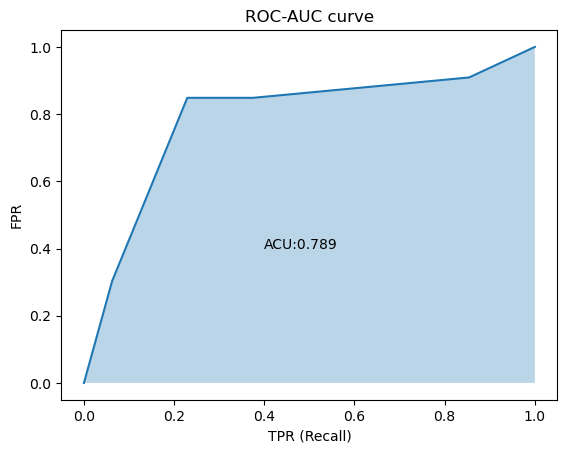

In [78]:
plt.plot(tpr,fpr)
plt.annotate(text = f'ACU:{auc:.3f}',xy=(0.4,0.4))
plt.fill_between(tpr,fpr,alpha=0.3)

plt.title('ROC-AUC curve')
plt.xlabel('TPR (Recall)')
plt.ylabel('FPR')

Text(0, 0.5, 'FPR')

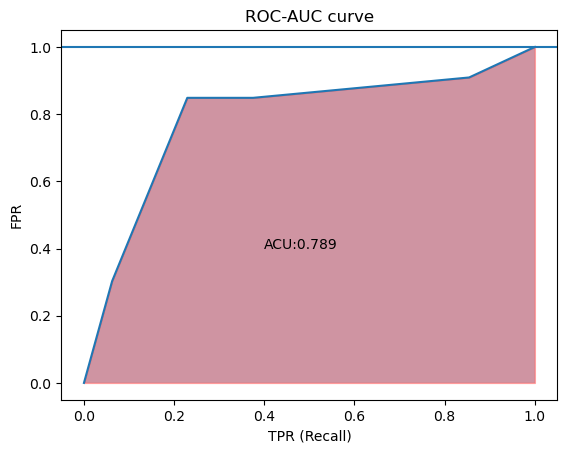

In [79]:
plt.plot(tpr,fpr)
plt.axhline(y=1)
plt.annotate(text = f'ACU:{auc:.3f}',xy=(0.4,0.4))
plt.fill_between(tpr,fpr,alpha=0.3)
plt.fill_between(tpr,fpr,alpha=0.3,color='r')

plt.title('ROC-AUC curve')
plt.xlabel('TPR (Recall)')
plt.ylabel('FPR')